In [1]:
from apriori import get_apriori_rules
from arm import MSTARM, Rule
import pandas as pd
import time
import pickle
import os

In [2]:
def say(message):
    os.system(f'say "{message}"')

In [3]:
min_support, min_confidence = 0.005, 0.6

In [25]:
arm = MSTARM('data/rust_vectors_product_category_no_fuel.csv', debug_mode=True)

Successfully initialized instance with graphs.


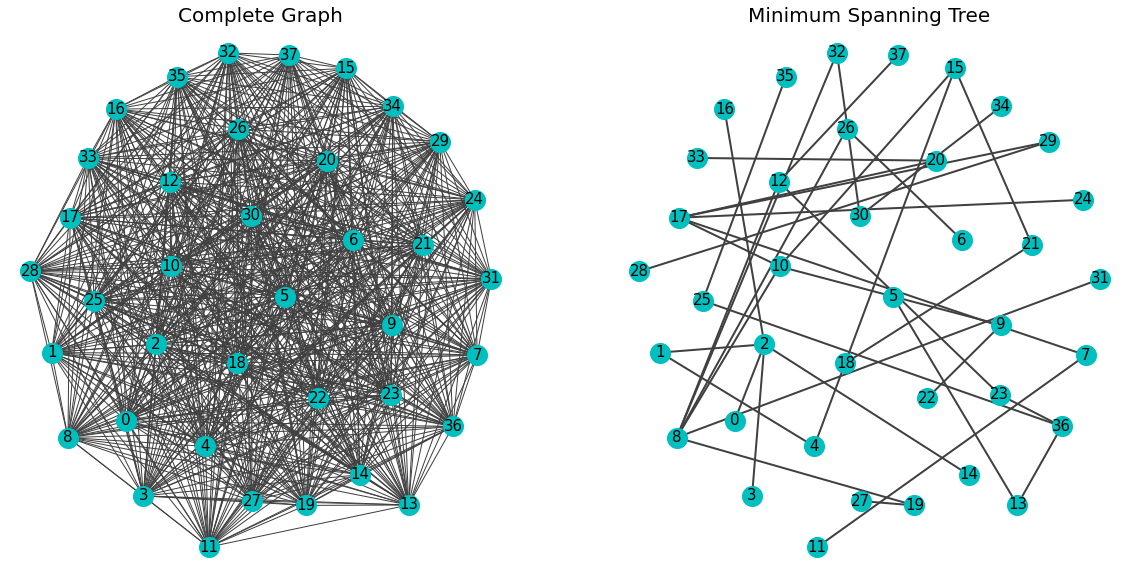

In [26]:
arm.plot_graph_and_mst(output_filepath='../images/graph_and_mst_no_fuel.png')

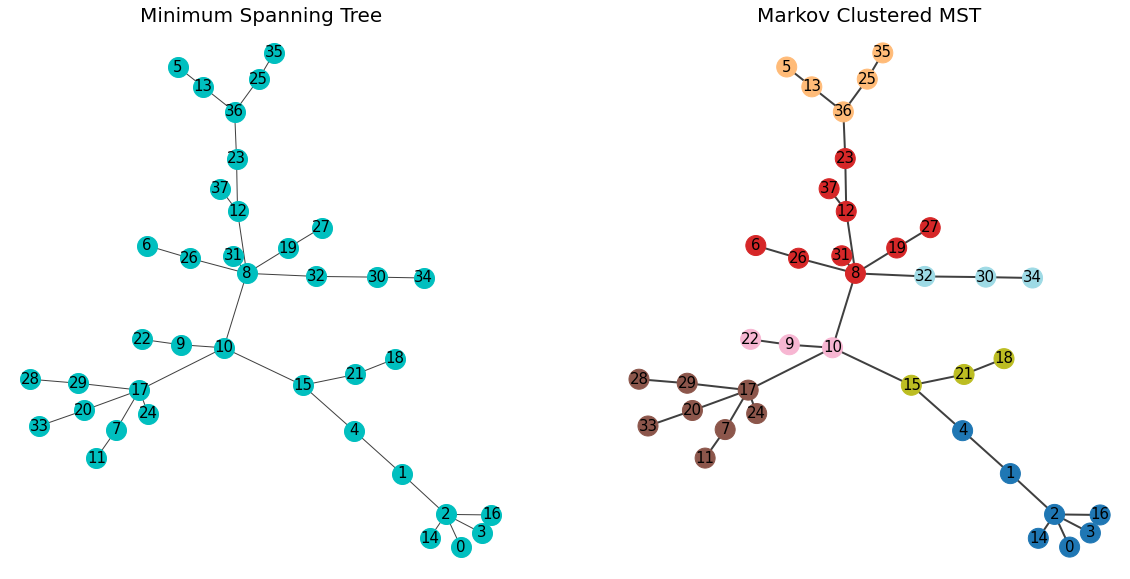

In [46]:
arm.plot_mst_clusters(output_filepath='../images/mst_clustered_no_fuel.png')

In [4]:
apri_rules = get_apriori_rules(min_support=min_support, min_confidence=min_confidence)

Finished in 3.38 minutes.


In [6]:
arm_rules = arm.generate_rules(min_support=min_support, min_confidence=min_confidence)

Finished cluster #1 of 6 | 284.93 seconds
Finished cluster #2 of 6 | 38.40 seconds
Finished cluster #3 of 6 | 0.63 seconds
Finished cluster #4 of 6 | 1.17 seconds
Finished cluster #5 of 6 | 15.11 seconds
Finished cluster #6 of 6 | 0.70 seconds
Finished in 5.68 minutes


In [7]:
say("Your code has finished running.")

In [8]:
import pickle
with open('data/output/arm_rules.pkl', 'wb') as f:
    pickle.dump(arm_rules, f)

In [9]:
# with open('data/output/arm_rules.pkl', 'rb') as f:
#     # q = pickle.load(f)

# len(q)

#### Sort rules by support; highest to lowest

In [10]:
key = lambda x: x.support
arm_rules.sort(key=key, reverse=True)
apri_rules.sort(key=key, reverse=True)

### Top 10 MST ARM rules

In [11]:
for rule in arm_rules[:10]:
    print(f'{", ".join(rule.lhs).ljust(37)} -> {", ".join(rule.rhs).ljust(40)} {rule.support}')

Diesel Auto Clean                     -> Special Gasoline, Diesel Auto Clean      0.11983870295094343
Diesel Auto Clean                     -> Special Gasoline                         0.11983870295094343
Special Gasoline, Diesel Auto Clean   -> Special Gasoline                         0.11983870295094343
Ethanol                               -> Special Gasoline                         0.1090004283804241
Special Gasoline, Ethanol             -> Ethanol                                  0.1090004283804241
Special Gasoline, Ethanol             -> Special Gasoline                         0.1090004283804241
Special Diesel                        -> Gasoline                                 0.08091681482530669
Special Diesel, Gasoline              -> Special Diesel                           0.08091681482530669
Special Diesel, Gasoline              -> Gasoline                                 0.08091681482530669
Lubricant                             -> Gasoline                                 0.0

### Top 10 Apriori rules

In [12]:
for rule in apri_rules[:10]:
    print(f'{", ".join(rule.lhs).ljust(37)} -> {", ".join(rule.rhs).ljust(40)} {rule.support}')

Gasoline                              -> Special Gasoline                         0.38946968271597415
Diesel Auto Clean                     -> Special Gasoline                         0.11983870295094343
Ethanol                               -> Special Gasoline                         0.1090004283804241
Diesel Auto Clean, Gasoline           -> Special Gasoline                         0.10117849780111501
Diesel Auto Clean, Special Gasoline   -> Gasoline                                 0.10117849780111501
Ethanol                               -> Gasoline                                 0.09478354104370691
Special Diesel                        -> Special Gasoline                         0.0913624553866484
Ethanol, Gasoline                     -> Special Gasoline                         0.09047744333953002
Ethanol, Special Gasoline             -> Gasoline                                 0.09047744333953002
Ethanol                               -> Gasoline, Special Gasoline               0.

### Top 10 mutual rules between MST ARM and Apriori

In [13]:
for a in arm_rules:
    for b in apri_rules:
        if (a.lhs == b.lhs) and (a.rhs == b.rhs):
            print(f'{", ".join(a.lhs).ljust(37)} -> {", ".join(a.rhs).ljust(40)} {a.support}')

Diesel Auto Clean                     -> Special Gasoline                         0.11983870295094343
Ethanol                               -> Special Gasoline                         0.1090004283804241
Special Diesel                        -> Gasoline                                 0.08091681482530669
Lubricant                             -> Gasoline                                 0.07129353399243829
Cigarettes                            -> Special Gasoline                         0.06792453047756634
Diesel                                -> Special Gasoline                         0.06716597617789723
Diesel Auto Clean, Ethanol            -> Special Gasoline                         0.035968580823124624
Cold Alcoholic Beverages              -> Special Gasoline                         0.02517104947822726
Cigarettes, Diesel                    -> Special Gasoline                         0.0152823611237366
Filters                               -> Gasoline                                 0

In [14]:
names = arm.names
for cluster in arm.clusters:
    items = []
    for i in cluster:
        items.append(names[i])
    print(', '.join(items))
    print(' ')

Special Gasoline, Diesel Auto Clean, Several, Ethanol, Cigarettes, Accessories, Cold Alcoholic Beverages, Coal, Diesel, Hot Alcoholic Beverages, Batteries, Special Diesel S10
 
Special Diesel, Lubricant, Gasoline, Filters, Additives And Fluids, Pickets, Canisters, Extinguisher, Covers
 
Popsicle And Ice Creams, Energy, Water, Mate Herb
 
Chewing Gum And Candy, Condom, Flavoring, Personal Hygiene, Perfumery
 
Chips, The Bakery, Juices And Soft Drinks, Biscuits And Wafer, Dairy Products And Materials, Salted Biscuit, Slippers, Pastas, Popcorn, Chas Juice Cafe In Powder
 
Chocolates, Derivatives Peanuts, Cereals, Toys, Sweet Coconut James
 
